In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from dateutil import parser
import time


In [56]:
os.chdir("F://buffalo//buffalo project//customer data set")

In [74]:
data= pd.read_csv("new_appdata10.csv")

In [77]:
data.tail()


,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


In [78]:
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


# cleaning the data 

In [79]:
data["hour"]=data.hour.str.slice(1,3).astype(float)


In [80]:
data_copy=data.copy().drop(columns=['user','screen_list','enrolled_date','first_open','enrolled'])
data_copy.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2.0,23,15,0,0,0
1,6,1.0,24,13,0,0,0
2,1,19.0,23,3,0,1,1
3,4,16.0,28,40,0,0,0
4,1,18.0,31,32,0,0,1


# Making Histogram

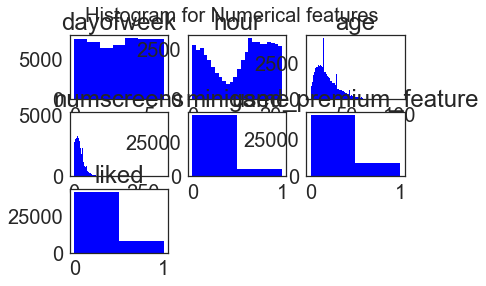

In [81]:
plt.suptitle("Histogram for Numerical features",fontsize=20)
for i in range(1,data_copy.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(data_copy.columns.values[i-1])
    
    vals=np.size(data_copy.iloc[:,i-1].unique())
    plt.hist(data_copy.iloc[:,i-1],bins=vals,color='blue')

# corelation wrt target

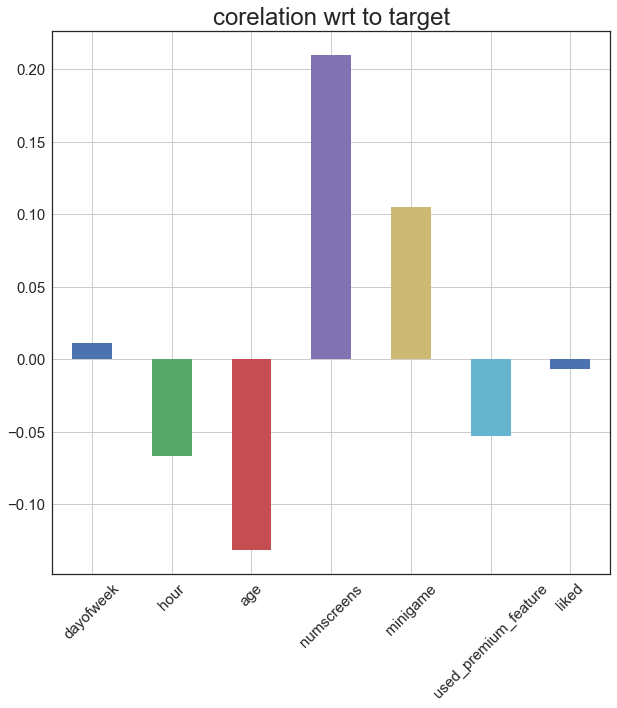

In [82]:
data_copy.corrwith(data.enrolled).plot.bar(figsize=(10,10),
                    title= "corelation wrt to target",
                     fontsize=15,rot=45,grid=True)

# correlation matrix

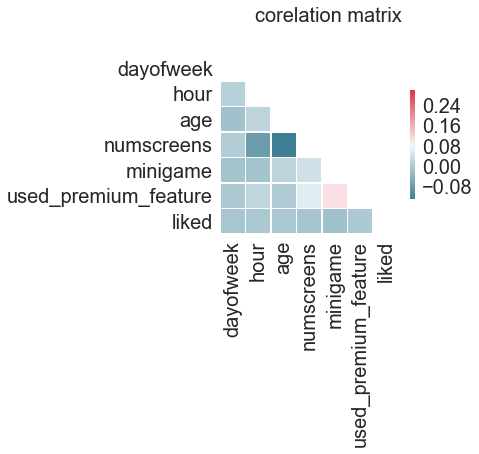

In [83]:
sns.set(style="white",font_scale=2)
corr=data_copy.corr()

# upper triangle
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

# fig size
f,ax=plt.subplots(figsize=(4,4))
f.suptitle("corelation matrix",fontsize=20)

# Generate a custom driving colormap
cmap=sns.diverging_palette(220,10,as_cmap=True)

# heat map
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,square=True,linewidths=.5,cbar_kws={"shrink":.5})

# Feature Engineering

In [84]:
data.dtypes

user                      int64
first_open               object
dayofweek                 int64
hour                    float64
age                       int64
screen_list              object
numscreens                int64
minigame                  int64
used_premium_feature      int64
enrolled                  int64
enrolled_date            object
liked                     int64
dtype: object

In [85]:
data["first_open"]=[parser.parse(row) for row in data['first_open']]


In [86]:
data["enrolled_date"]=[parser.parse(row) if isinstance (row,str) else row for row in data['enrolled_date']]

In [87]:
data["diff_of_date"]=(data.enrolled_date-data.first_open).astype('timedelta64[h]')

Text(0.5,1,'Distribution of time since enrolled')

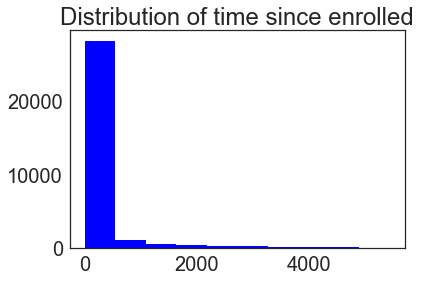

In [88]:
plt.hist(data['diff_of_date'].dropna(),color='blue')
plt.title("Distribution of time since enrolled")

Text(0.5,1,'Distribution of time since enrolled')

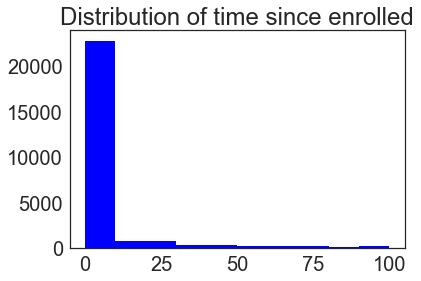

In [89]:
plt.hist(data['diff_of_date'].dropna(),color='blue',range=[0,100])
plt.title("Distribution of time since enrolled")

In [90]:
data.loc[data.diff_of_date >48,'enrolled'] =0
data=data.drop(columns=['diff_of_date','enrolled_date','first_open'])

In [94]:
data.tail()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
49995,222774,3,13.0,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0.0,35,"Cycle,Splash,Home,RewardsContainer,",4,0,1,0,0
49997,302367,2,22.0,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12.0,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0
49999,27047,4,1.0,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,1


#Feature engg for screen column


In [92]:
topscreen=pd.read_csv('top_screens.csv').top_screens.values

In [93]:
data["screen_list"]=data.screen_list.astype(str)+','

In [95]:
for sc in topscreen:
    data[sc]=data.screen_list.str.contains(sc).astype(int)
    data["screen_list"]=data.screen_list.str.replace(sc+",","")

In [96]:
data["other"]=data.screen_list.str.count(",")
data=data.drop(columns=["screen_list"])

# Funnel

In [102]:
saving_screens=["Saving1",
                "Saving2",
               "Saving2Amount",
               "Saving4",
               "Saving5",
               "Saving6",
               "Saving7",
               "Saving8",
               "Saving9",
               "Saving10",]
data["SavingsCount"]=data[saving_screens].sum(axis=1)
data=data.drop(columns=saving_screens)

cm_screens=["Credit1",
           "Credit2",
           "Credit3",
           "Credit3Container",
           "Credit3Dashboard"]
data["cmscreens"]=data[cm_screens].sum(axis=1)
data=data.drop(columns=cm_screens)


cc_screens=["CC1",
           "CC1Category",
           "CC3"]
data["ccscreens"]=data[cc_screens].sum(axis=1)
data=data.drop(columns=cc_screens)

loan_screens=["Loan",
              "Loan2",
              "Loan3",
              "Loan4"
             ]
data["loanscreens"]=data[loan_screens].sum(axis=1)
data=data.drop(columns=loan_screens)


In [103]:
data.tail()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount,cmscreens,ccscreens,loanscreens
49995,222774,3,13.0,32,13,0,0,1,0,0,...,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0.0,35,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22.0,39,25,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12.0,27,26,0,0,1,0,1,...,0,0,0,0,0,13,0,0,0,0
49999,27047,4,1.0,25,26,0,0,0,1,0,...,0,0,0,0,0,5,7,0,0,1


In [104]:
data.to_csv("featured_data.csv",index=False)

In [158]:
new_data=pd.read_csv("featured_data.csv")


# data pre processing

In [159]:
response =new_data['enrolled']
new_data=new_data.drop(columns="enrolled")

In [160]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(new_data,response,test_size=.2,random_state=0)

In [161]:
train_identifier=X_train["user"]
X_train=X_train.drop(columns="user")

test_identifier=X_test["user"]
X_test=X_test.drop(columns="user")

# feature scaling

In [162]:
from sklearn.preprocessing import StandardScaler

sc_X =StandardScaler()
X_train2=pd.DataFrame(sc_X.fit_transform(X_train))
X_test2=pd.DataFrame(sc_X.transform(X_test))


In [163]:
X_train2.columns=X_train2.columns.values
X_test2.columns=X_test2.columns.values


In [164]:
X_train2.index=X_train.index.values
X_test2.index=X_test.index.values

X_train=X_train2
X_test=X_test2

# model building

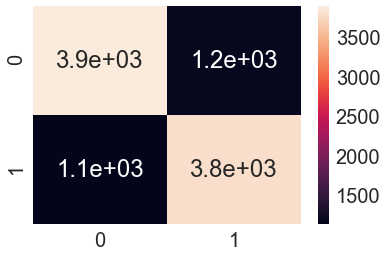

In [165]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0,penalty='l1')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)



In [152]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.77      0.77      0.77      5072
          1       0.76      0.77      0.77      4928

avg / total       0.77      0.77      0.77     10000



In [166]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print("log accuracy:%0.3f(+/- %.3f)" %(acc.mean(),acc.std()*2))

log accuracy:0.767(+/- 0.010)


# Final results

In [168]:

final_results=pd.concat([y_test,test_identifier],axis=1).dropna()
final_results['predictions']=y_pred
final_results[['user','enrolled','predictions']].reset_index(drop=True)

,user,enrolled,predictions
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0
